# Proyek Analisis Data: [sellers_dataset]


- **Nama:** [Muhammad Gabriel Somoal]
- **Email:** [gabrielsomoal@gmail.com]
- **ID Dicoding:** [gabrielsomoal]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana demografi sales tertinggi dan terendah pada kota-kota di state ES?
- Pertanyaan 2: Bagaimana distribusi sales pada kota-kota yang berada pada negara ES?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import math

## Data Wrangling

### Gathering Data

In [130]:
#Load data day
e_commerce = pd.read_csv("sellers_dataset.csv")
e_commerce.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [131]:
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [133]:
#Untuk mengetahui missing value pada sellers_dataset
e_commerce.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [134]:
#Untuk memeriksa duplikasi data
print("Jumlah duplikasi: ", e_commerce.duplicated().sum())

Jumlah duplikasi:  0


In [136]:
"""Untuk memeriksa parameter statistik (mean, median, dll)
dari kolom numerik yang terdapat dalam sellers_dataset."""
e_commerce.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [147]:
"""Untuk merubah nama kolom yang semula seller_zip_code_prefix menjadi seller_zip
demi kemudahan dalam analisis"""
ecommerce = e_commerce.rename(columns={'seller_zip_code_prefix': 'seller_zip'})
ecommerce.head(5)

,seller_id,seller_zip,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Cleaning Data

In [148]:
#Menampilkan informasi mengenai kolom serta data type
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_id     3095 non-null   object
 1   seller_zip    3095 non-null   int64 
 2   seller_city   3095 non-null   string
 3   seller_state  3095 non-null   string
dtypes: int64(1), object(1), string(2)
memory usage: 96.8+ KB


In [153]:
#Merubah tipe data dari object menjadi string
ecommerce["seller_city"] = e_commerce["seller_city"].astype("string")

In [154]:
#Merubah tipe data dari object menjadi string
ecommerce["seller_state"] = e_commerce["seller_state"].astype("string")

In [155]:
#Menampilkan informasi mengenai kolom serta data type
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_id     3095 non-null   object
 1   seller_zip    3095 non-null   int64 
 2   seller_city   3095 non-null   string
 3   seller_state  3095 non-null   string
dtypes: int64(1), object(1), string(2)
memory usage: 96.8+ KB


Telah berhasil merubah tipe data menjadi string

## Exploratory Data Analysis (EDA)

### Explore ...

In [156]:
#Melihat rangkuman parameter statistik dari data sellers_dataset menggunakan metode describe()
ecommerce.describe(include="all")

,seller_id,seller_zip,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Menggunakan parameter include="all" yang berarti juga akan menampilkan seluruh data yang ada

In [157]:
#Menghitung jumlah data berdasarkan 15 data teratas dari kolom seller_state
state_counts = ecommerce["seller_state"].value_counts().head(15)
#Pertanyaan 1 - Membuat variabel state_ES yang berguna untuk menganalisis data ES pada seller_state
state_ES = ecommerce.loc[ecommerce["seller_state"] == "ES"]
#Pertanyaan 2 - Membuat variabel state_CE yang berguna untuk menganalisis data CE pada seller_state
state_CE = ecommerce.loc[ecommerce["seller_state"] == "CE"]

In [158]:
print("Jumlah data untuk setiap seller_state: ")
print(state_counts)

Jumlah data untuk setiap seller_state: 
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
Name: seller_state, dtype: Int64


In [159]:
#Pertanyaan 1
print("Data seller_city berdasarkan state ES: ")
print(state_ES["seller_city"])

Data seller_city berdasarkan state ES: 
414                       viana
563     cachoeiro de itapemirim
622              cariacica / es
690                  vila velha
963            domingos martins
1076                    vitoria
1109                  cariacica
1186                 vila velha
1222    cachoeiro de itapemirim
1260                 vila velha
1315                   colatina
1342    cachoeiro de itapemirim
1424                    vitoria
1556                    vitoria
2063                  cariacica
2153             afonso claudio
2280                      serra
2387                      serra
2538    cachoeiro de itapemirim
2805                      serra
2933                    vitoria
2952                 vila velha
3010                      muqui
Name: seller_city, dtype: string


In [160]:
#Pertanyaan 2
print("Data seller_city berdasarkan state CE: ")
print(state_CE["seller_city"])

Data seller_city berdasarkan state CE: 
188            fortaleza
492            fortaleza
628              mucambo
798            fortaleza
876             pacatuba
1013    juzeiro do norte
1307           fortaleza
1570           fortaleza
1699           fortaleza
1945             eusebio
2454             caucaia
2550           fortaleza
3016       varzea alegre
Name: seller_city, dtype: string


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana demografi sales tertinggi dan terendah pada kota-kota di state ES?

In [161]:
max_min_state_ES = ecommerce.groupby(state_ES["seller_city"]).agg({"seller_id": "count"}).rename(columns={"seller_id": "Total Sales"}).sort_values(by="Total Sales", ascending=False).reset_index().rename(columns={"seller_city": "Kota"})
print(max_min_state_ES.to_string(index=False))

                   Kota  Total Sales
cachoeiro de itapemirim            4
             vila velha            4
                vitoria            4
                  serra            3
              cariacica            2
         afonso claudio            1
         cariacica / es            1
               colatina            1
       domingos martins            1
                  muqui            1
                  viana            1


Berdasarkan analisis yang sudah dilakukan, kota yang paling banyak melakukan penjualan adalah kota Sao Paulo dengan torehan 694 penjualan dan kota yang paling sedikit melakukan penjualan adalah kota Viana hingga kota Xaxim dengan torehan 1 penjualan yang dapat dilihat pada tabel di atas

<ipython-input-162-e2fb94a67e1d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Sales', y='Kota', data=combine, palette="Blues_r")


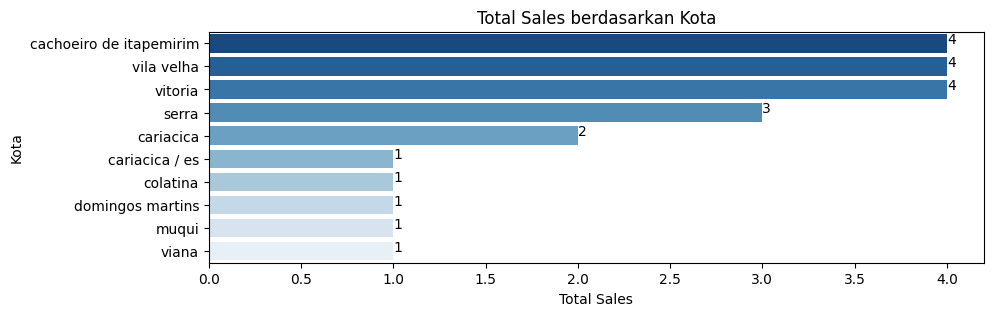

In [162]:
top = max_min_state_ES.head(5)
bottom = max_min_state_ES.tail(5)

combine = pd.concat([top, bottom])

plt.figure(figsize=(10, 3))
sns.barplot(x='Total Sales', y='Kota', data=combine, palette="Blues_r")
plt.xlabel=('Total Sales')
plt.ylabel=('Kota')
plt.title('Total Sales berdasarkan Kota')

for index, value in enumerate(combine['Total Sales']):
  plt.text(value, index, str(value))
plt.show()

Pada visualisasi tersebut, dapat dilihat bahwa semakin banyak sales dari sebuah kota maka semakin gelap warna bar nya, dengan *peringkat pertama* nya adalah kota **Sao Paulo** dengan perolehan **694 sales**, *peringkat kedua* nya adalah kota **Curitiba** dengan perolehan **127 sales** dan *peringkat ketiga* nya adalah kota **Rio De Janeiro** dengan perolehan **96 sales**

Pada visualisasi tersebut, dapat dilihat bahwa semakin banyak sales dari sebuah negara maka semakin gelap warna bar nya, dengan *peringkat pertama* nya adalah negara **SP** dengan perolehan **1849 sales**, *peringkat kedua* nya adalah kota **PR** dengan perolehan **349 sales** dan *peringkat ketiga* nya adalah kota **MG** dengan perolehan **244 sales**

### Pertanyaan 2: Bagaimana distribusi sales pada kota-kota yang berada pada negara MS?

In [163]:
dist_state_CE = ecommerce.groupby(state_CE["seller_city"]).agg({"seller_id": "count"}).rename(columns={"seller_id": "Total Sales"}).sort_values(by="Total Sales", ascending=False).reset_index().rename(columns={"seller_city": "Kota"})
print(dist_state_CE.to_string(index=False))

            Kota  Total Sales
       fortaleza            7
         caucaia            1
         eusebio            1
juzeiro do norte            1
         mucambo            1
        pacatuba            1
   varzea alegre            1


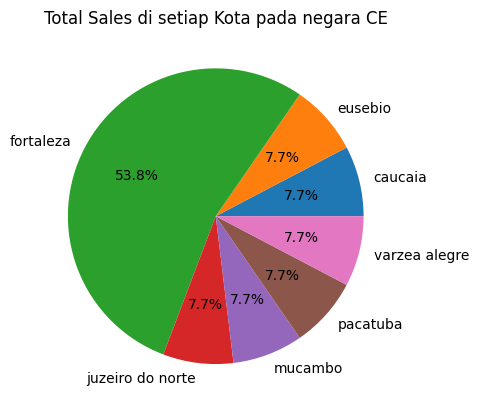

In [164]:
#Hitung total sales untuk setiap kota
total_sales_CE = state_CE.groupby("seller_city")["seller_id"].count()

#Hitung persentase sales untuk setiap kota
percentages = total_sales_CE / total_sales_CE.sum()

#Buat diagram lingkaran
plt.pie(percentages, labels=total_sales_CE.index, autopct='%1.1f%%')
plt.title("Total Sales di setiap Kota pada negara CE")
plt.show()

## Conclusion

- Conclution pertanyaan 1: Dapat di simpulkan bahwa kota Cachoeiro de Itapemirim, Vila Velha,  dan Vitoria sebagai kota dengan sales tertinggi, dengan demikian di harapkan stakeholder dapat melanjutkan strategi marketing lainnya agar dapat meningkatkan sales di 3 kota tersebut sehingga dapat meningkatkan laba pada perusahaan. Kemudian, kota Cariacica/Es, Colatina, Domingos Martins, Muqui, dan Viana merupakan kota dengan sales terendah, dengan demikian di harapkan stakeholder dapat menimbangkan untuk melanjutkan bisnis nya di kota-kota tersebut. Adapun kota yang berada di ambang tengah yaitu kota Serra dan Cariacica, dengan demikian di harapkan stakeholder dapat menimbangkan bisnis nya pada 2 kota tersebut.



- Conclution pertanyaan 2: Dapat disimpulkan bahwa kota Fortaleza merupakan kota dengan sales tertinggi yaitu sebesar 53.8% dan di ikuti oleh 6 kota lainnya yaitu Juzeiro do Norte, Mucambo, Pacatuba, Varzea Alegre, Caucaia, dan Eusebio dengan masing masing data sales nya sebesar 7.7%. Di harapkan dengan data ini, stakeholder dapat menimbangkan bisnis nya pada 6 kota tersebut dan meningkatkan sales nya pada kota Fortaleza sehingga dapat berdampak baik pada perusahaan.  